# Hyun-Joon Yang
# yanghyun@usc.edu
# BISC 481
# HW2

<hr>

In [1]:
from IPython.display import Image
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
.output_jpeg {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

## Question 1: General knowledge

### A. Name (i) the two main physical interactions that stabilize the DNA double helix and (ii) explain the physical basis for each of those interactions. 4pts

* Van der Waals interactions, electrostatic interactions
* Stacking of base pairs combines van der Waals interaction and electrostatic interaction of the bases resulting in stabilization of the double helix. In addition, the negative electrostatic repulsion of the phosphate backbone needs a conformation that puts them as far away from each other as possible, thus contributing to the shape.

### B. List and briefly explain the definition of (i) three intra-base pair helical parameters of your choice, (ii) three inter-base pair parameters of your choice, and (iii) three other structural parameters that are used to describe nucleic acid structure. 6pts

* **intra-base pair parameters**
    * *stretch*
        * distance between the 2 bases along the axis of base pairing / bonding
    * *stagger*
        * distance between the 2 bases along the helical axis
    * *propeller twist*
        * degree of rotation of one base with respect to another along the axis of base pairing / bonding
* **inter-base pair parameters**
    * *twist*
        * degree of rotation of one base pair with respect to another along helical axis
    * *rise*
        * distance between 2 base pairs along the helical axis
    * *slide*
        * relative displacement of the base pairs along the axis of base pairing / bonding
* **other structural parameters**
    * *helix sense*
        * right or left handedness of the helix
    * *diameter of helix*
        * diameter of the helix when looking along the helical axis
    * *bases per turn*
        * number of bases needed for a complete turn

### C. Briefly explain the basis for (a) base readout and (b) shape readout of DNA sequence through DNA binding proteins 4pts

* In base readout, the protein recognizes the specific pattern of H-bond donor, acceptor, and nonpolar methyl group produced by the base pairing.
* In shape readout, the protein recognizes change in the conformation of the DNA, allowing the protein to bind to it.

## Question 2: DNA Structure
This question will use the two PDB files provided with this assignment, `red.pdb` and `blue.pdb`. One of these contains the structure of an A-DNA helix, and the other of a B-DNA helix. Let’s determine which is which.

### A. Using PyMol, open both structures within the same session.
### Play around with the various visualization options to get familiar with them.
### Now, use the align command (https://pymolwiki.org/index.php/Align) to superimpose these two structures, then use the translate command (https://pymolwiki.org/index.php/Translate) to shift one of them so that they are in the same orientation, but not overlapping.
### Produce a visualization similar to the one below (but using a different color scheme than I did) and include it in your report. 
### Describe some of the differences you observe between these two structures (aside from the different number of nucleotides). 4pts

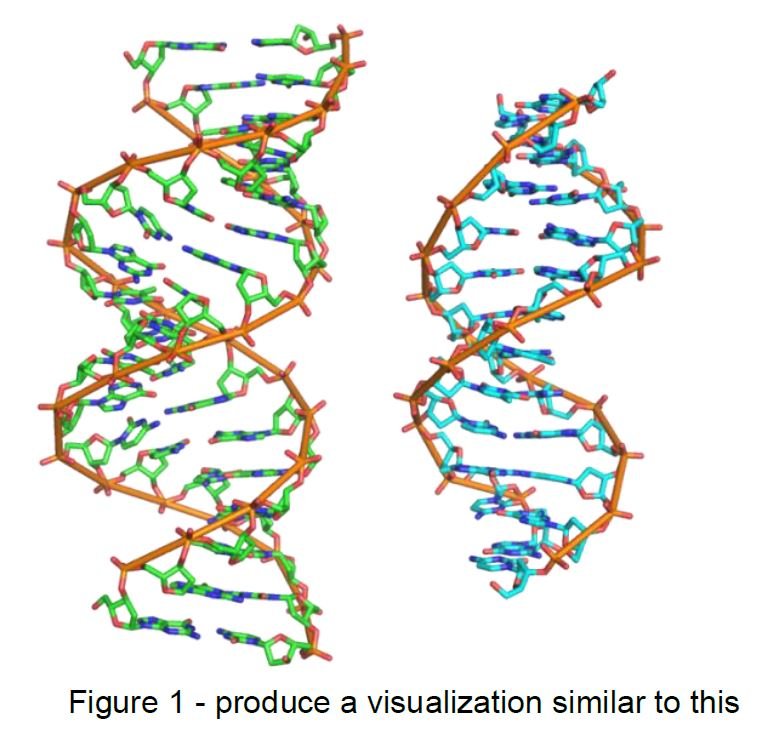

In [2]:
Image("img1.jpg", width=300)

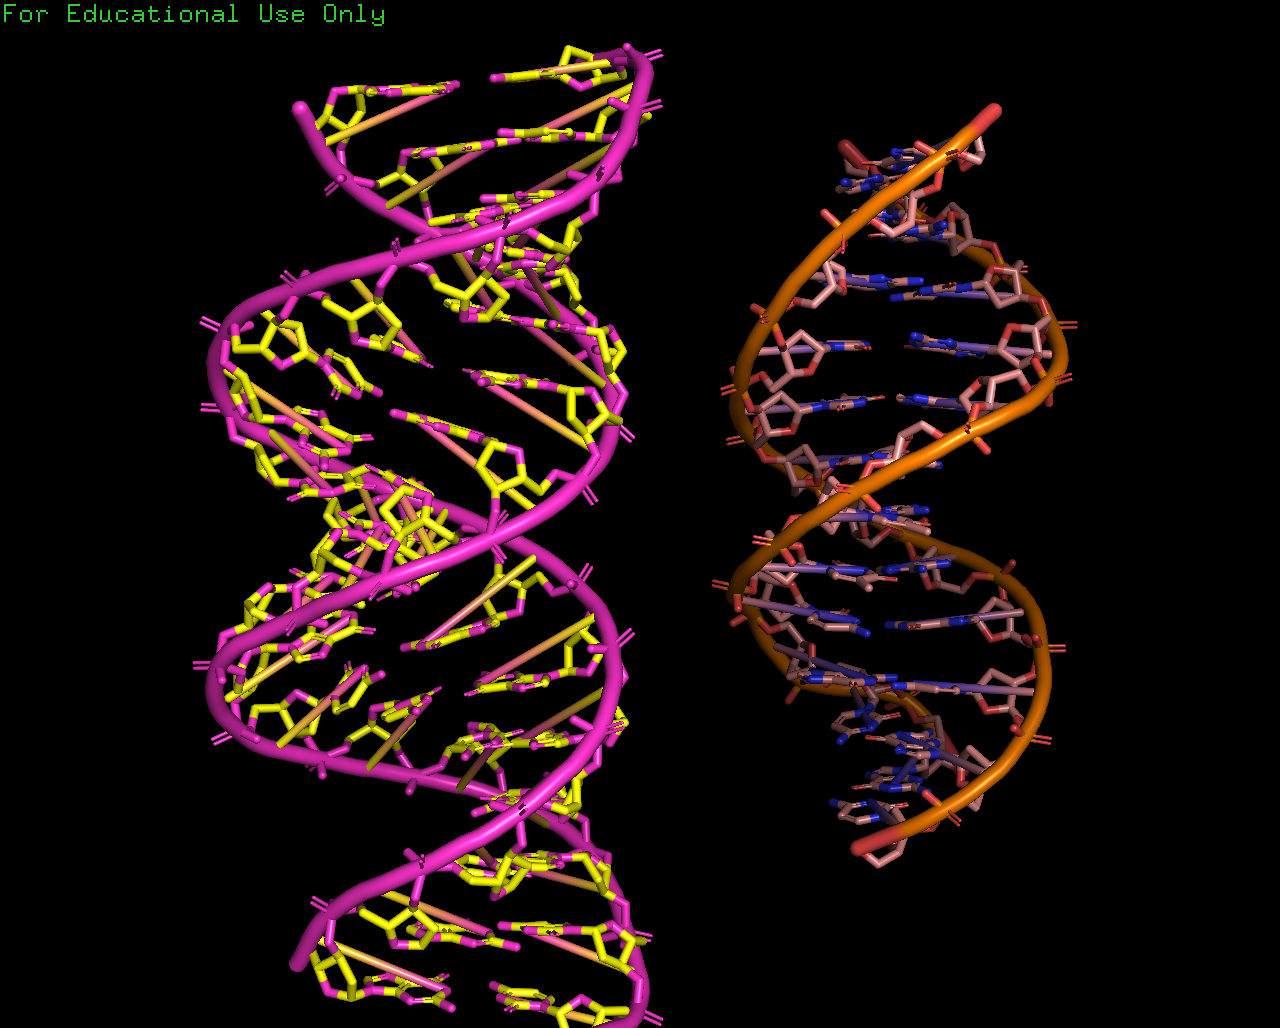

In [3]:
Image("2-A.png", width=300)

<p style='text-align: center'>Shown: red(left), blue(right)</p>

Blue has a smaller diameter and has bases closer to helical axis than red in addition to having bases almost perpendicular to the helical axis as opposed to the tilted bases of red.

### B. Let’s take a look at the DNA shape parameters and quantify the differences between the structures.
### We will use the 3DNA web server to calculate some DNA shape parameters for the two helices. Visit http://web.x3dna.org/ and upload the `red.pdb` and `blue.pdb` files individually. You’ll be shown a page with some visualizations and a lot of information. Scroll down to the following section:

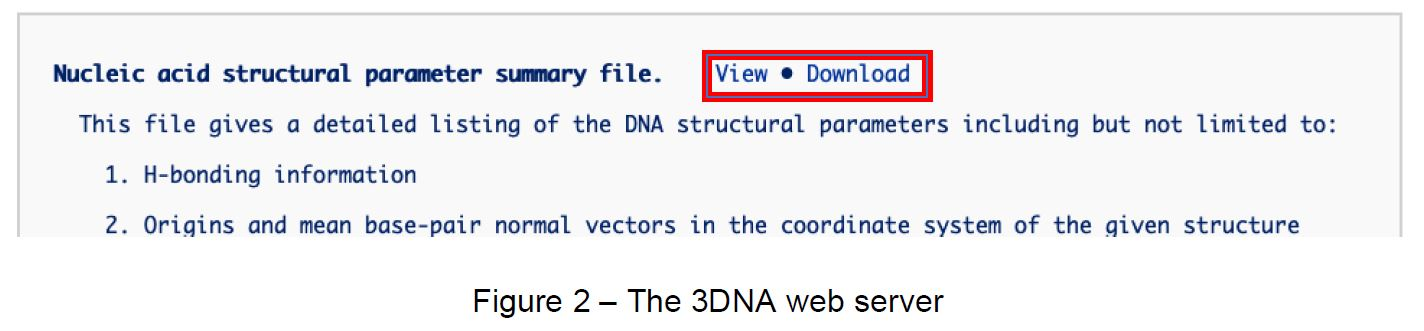

In [4]:
Image("img2.jpg", width=700)

### Download the parameter summary file for both structures. Within that file, find the table labeled as “Local base-pair helical parameters”.
### Take the data in that table and plot two of the shape parameters for both of the helices:
* Plot x-displacement vs inclination as a scatter plot for both structures (plot everything on the same graph)
* Color the `red.pdb` points red, and `blue.pdb` points blue
* Label the horizontal and vertical axis appropriately
* Include, for each set of points, the **median** point, and plot it as a large, distinct point which is easily identified, and label it

### Include this plot in your report. 10pts

In [5]:
import matplotlib.pyplot as plt
import numpy as np

np.set_printoptions(precision=2, suppress=True)

def read(filename):
    """
    takes in string for filename then returns numpy array of extracted data
    :param filename: string for filename
    :return: ndarray of extracted data
    """
    start = False
    end = '*'*76
    data = []
    # only add relevant lines
    with open(filename, 'r') as f:
        for line in f:
            if line == 'Local base-pair helical parameters\n':
                start = True
            elif line == '*'*76 + '\n':
                start = False
            if start:
                data.append(line.strip())
    # get rid of necessary rows
    data = data[2:-3]
    # get necessary columns
    for i in range(len(data)):
        data[i] = data[i].split()
        data[i] = data[i][2:]
    return data

def convert(data):
    """
    takes in list representing matrix then returns numpy array
    :param data: list representing matrix
    :return: ndarray
    """
    # turn string into float
    for i in range(len(data)):
        for j in range(len(data[i])):
            data[i][j] = float(data[i][j])
    # turn into ndarray
    arr = np.array(data)
    return arr


In [6]:
arr_red = convert(read('red_summary.txt'))
arr_blue = convert(read('blue_summary.txt'))
print(arr_red)
print(arr_blue)

[[ -4.11  -0.59   2.8   11.05  -3.81  30.65]
 [ -1.69  -1.28   3.63  -3.8    1.5   40.37]
 [ -5.96   0.14   1.7   22.2   -4.03  24.31]
 [ -3.42   1.36   2.85  12.04   1.64  35.01]
 [ -4.82  -0.02   3.15  10.61  -9.03  32.  ]
 [ -3.7    1.28   3.12  14.04 -21.94  41.96]
 [ -3.07  -1.36   2.11  16.56  21.95  23.71]
 [ -1.12  -1.9    2.9   18.84   4.24  42.99]
 [ -8.71   0.     1.56  48.94  -0.    20.76]
 [ -1.12   1.9    2.9   18.84  -4.24  42.99]
 [ -3.07   1.36   2.11  16.56 -21.95  23.71]
 [ -3.7   -1.28   3.12  14.04  21.94  41.96]
 [ -4.82   0.02   3.15  10.61   9.03  32.  ]
 [ -3.42  -1.36   2.85  12.04  -1.64  35.01]
 [ -5.96  -0.14   1.7   22.2    4.03  24.31]
 [ -1.69   1.28   3.63  -3.8   -1.5   40.37]
 [ -4.11   0.59   2.8   11.05   3.81  30.65]]
[[ -0.55   0.11   3.52   9.23   4.88  40.93]
 [  0.98  -0.65   3.48  -7.21  -1.23  38.44]
 [ -0.56   1.68   3.03  18.03  -8.24  25.96]
 [ -0.25  -0.31   3.35   4.51   3.82  41.1 ]
 [ -0.65  -0.27   3.31   1.56   1.16  35.37]
 [ -0.58 

x-disp: [-4.11 -1.69 -5.96 -3.42 -4.82 -3.7  -3.07 -1.12 -8.71 -1.12 -3.07 -3.7
 -4.82 -3.42 -5.96 -1.69 -4.11]
incl: [11.05 -3.8  22.2  12.04 10.61 14.04 16.56 18.84 48.94 18.84 16.56 14.04
 10.61 12.04 22.2  -3.8  11.05]
median: 14.04 -3.7
x-disp: [-0.55  0.98 -0.56 -0.25 -0.65 -0.58 -0.39 -0.04  0.87  1.96  0.63]
incl: [  9.23  -7.21  18.03   4.51   1.56  -4.6    1.19  -0.08   7.54 -16.99
  -5.47]
median: 1.19 -0.25


Text(0.5, 1.0, 'x-displacement vs inclination')

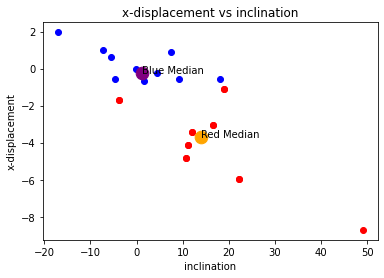

In [7]:
y = arr_red[:,0]
x = arr_red[:,3]
median_x = np.median(x)
median_y = np.median(y)
print('x-disp:', y)
print('incl:', x)
print('median:', median_x, median_y)
plt.scatter(x, y, c='red')
plt.annotate('Red Median', (median_x, median_y))
plt.scatter(median_x, median_y, s=[20*2**3], c='orange')

y = arr_blue[:,0]
x = arr_blue[:,3]
median_x = np.median(x)
median_y = np.median(y)
print('x-disp:', y)
print('incl:', x)
print('median:', median_x, median_y)
plt.scatter(x, y, c='blue')
plt.annotate('Blue Median', (median_x, median_y))
plt.scatter(median_x, median_y, s=[20*2**3], c='purple')

plt.xlabel('inclination')
plt.ylabel('x-displacement')
plt.title('x-displacement vs inclination')

### C. Based on the two visualizations you’ve produced in part 2.A and 2.B, which helix is A-DNA and which is B-DNA? Justify your response. 2pts

Comparing the median points of the 2 molecules with the known x-displacement & inclination of A-DNA and B-DNA, it seems that blue is B-DNA (output: (1.19, -0.25) vs known: (1.5, 0)) while red is A-DNA (output: (14.04, -3.7) vs known: (20.7, -5.3)). 

### D. *BONUS* Using the protein data bank or another web site, find an example of a Z-DNA helix. Reproduce the same plot as you made in part 2.B, but this time add the shape parameters of the Z-DNA helix colored in green. Also include a visualization of this helix using PyMol in your report. 4pts

In [8]:
arr_z = read('z-dna_summary.txt')
arr_z = convert(arr_z[:5])
print(arr_z)

[[-50.91 -12.86   3.43  -0.63 -19.65  -6.08]
 [  1.71   0.07   3.1    7.4    0.28 -51.59]
 [-21.23   7.63   5.28  24.89  14.02  -8.98]
 [  1.3   -0.33   3.16   3.72  -0.9  -53.26]
 [-34.63   5.19   3.97   5.03   9.44  -8.54]]


x-disp: [-50.91   1.71 -21.23   1.3  -34.63]
incl: [-0.63  7.4  24.89  3.72  5.03]
median: 5.03 -21.23


Text(0.5, 1.0, 'x-displacement vs inclination')

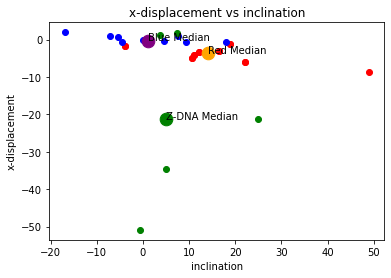

In [9]:
y = arr_red[:,0]
x = arr_red[:,3]
median_x = np.median(x)
median_y = np.median(y)
plt.scatter(x, y, c='red')
plt.annotate('Red Median', (median_x, median_y))
plt.scatter(median_x, median_y, s=[20*2**3], c='orange')

y = arr_blue[:,0]
x = arr_blue[:,3]
median_x = np.median(x)
median_y = np.median(y)
plt.scatter(x, y, c='blue')
plt.annotate('Blue Median', (median_x, median_y))
plt.scatter(median_x, median_y, s=[20*2**3], c='purple')

y = arr_z[:,0]
x = arr_z[:,3]
median_x = np.median(x)
median_y = np.median(y)
print('x-disp:', y)
print('incl:', x)
print('median:', median_x, median_y)
plt.scatter(x, y, c='green')
plt.annotate('Z-DNA Median', (median_x, median_y))
plt.scatter(median_x, median_y, s=[20*2**3], c='green')

plt.xlabel('inclination')
plt.ylabel('x-displacement')
plt.title('x-displacement vs inclination')

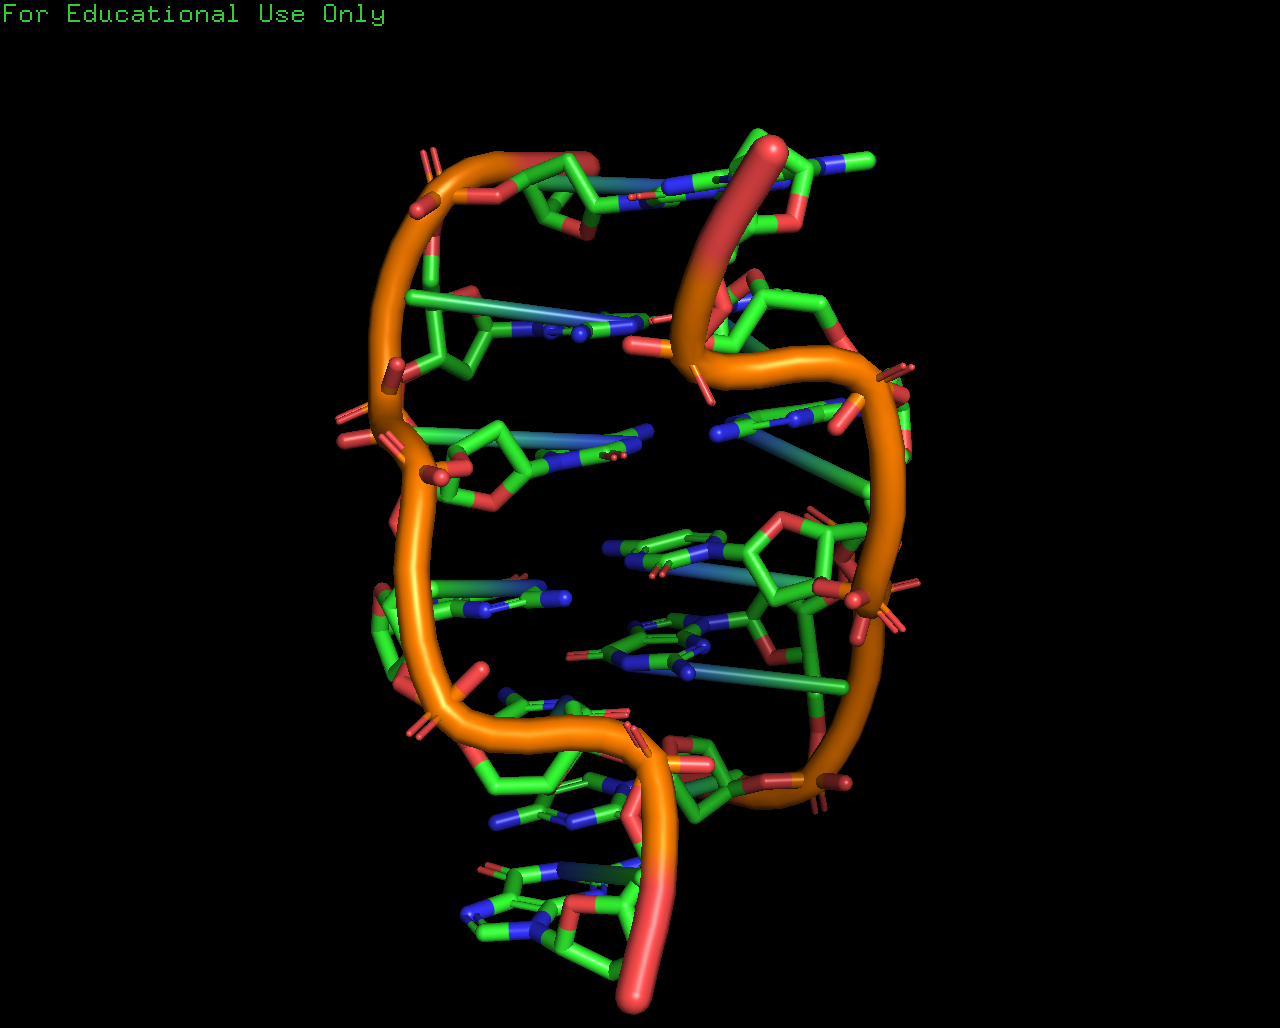

In [10]:
Image('2-D.png', width=300)

## Question 3: Poisson-Boltzmann Electrostatics

We will use the PyMol plugin known as “APBS Electrostatics” to perform a Poisson-Boltzmann calculation on a protein structure. This will allow us to visualize the electrostatic potential of that protein. I have provided you with the structure of a homeodomain (a protein domain that binds DNA) for this purpose.

### A. Open the file `1jgg_A.pdb` (provided) in PyMol. We are going to perform 3 separate Poisson-Boltzmann calculations on this protein structure using different settings. Please do these separately (in different PyMol sessions) in order to avoid making mistakes.
### For all three runs, you must include visualizations of the resulting electrostatic potential surface in your report.
1. With PyMol open, at the top of the screen you will see a “Plugin” menu. Open this and select “APBS Electrostatics” and a new window will open. For the first run, we will leave everything as default. Click “Run”. You will get a warning stating “pdb2pqr emitted warnings, do you want to continue?” click “yes”. A surface will be added to your PyMol session that is colored from red to blue. This surface represents the solvent excluded surface of the protein with the value of the electrostatic potential at the surface represented by the color (blue is positive, red is negative).

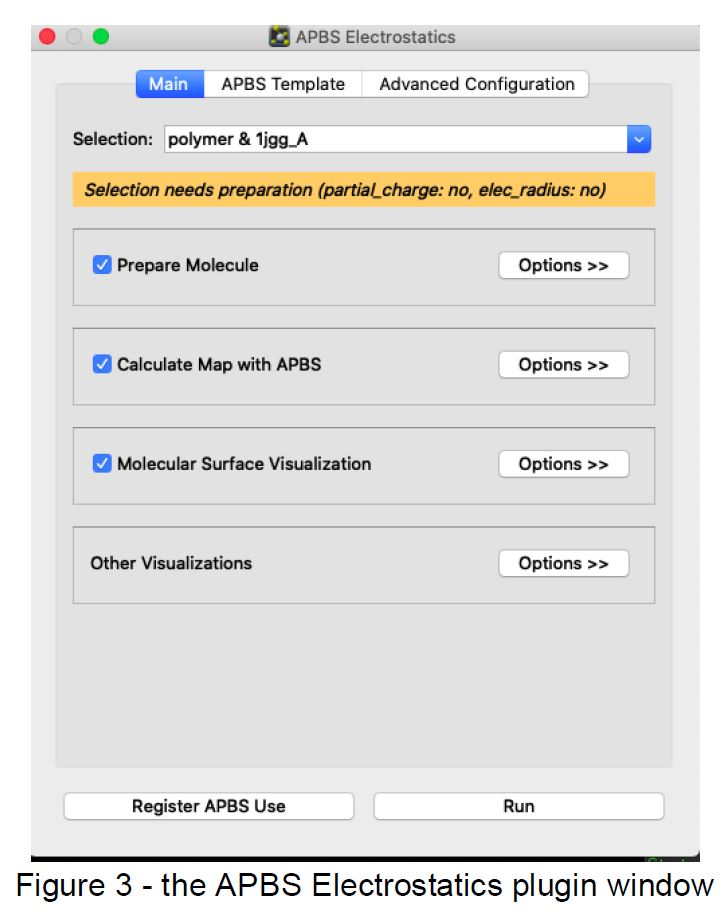

In [11]:
Image("img3.jpg", width=400)

2. Perform a second calculation, but this time go to “APBS Template” at the top of the ABPS Electrostatics pop-up window. Here we can adjust the parameters used in the calculation. Near the bottom, you will see the following two lines: <br>
`ion charge +1 conc 0.15 radius 2.0` <br>
`ion charge -1 conc 0.15 radius 1.8` <br>
These lines specify the charge, concentration and ionic radius of two salts that are, by default, included in our calculation. Change the value of “conc” from 0.15 to 0.0 in both lines – this effectively removes any ionic charge from the calculation. Perform a second calculation as before.


3. Perform a third calculation, but this time set the salt concentrations to 0.45, and change “lpbe” to “npbe” (don’t worry about what this means). This triples the salt concentration relative to the first calculation.

### Now, include visualizations for all three runs in your report. Include two different camera angles for each run and try to make the angles consistent with each other between runs. Be sure to label each run correctly! 10pts

**RUN 1**

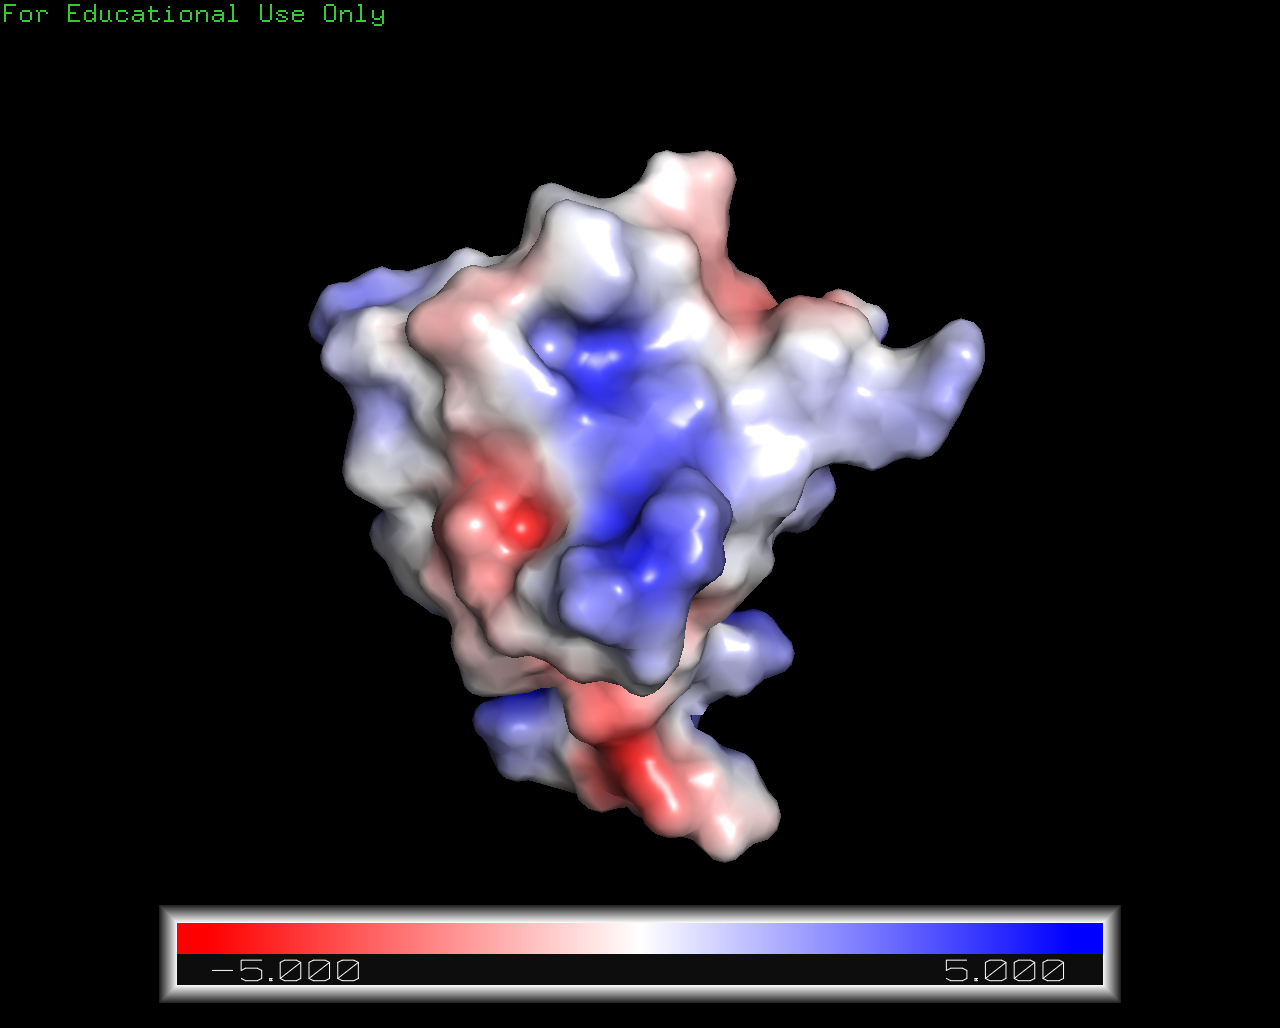

In [12]:
Image('3-1A.png', width=400)

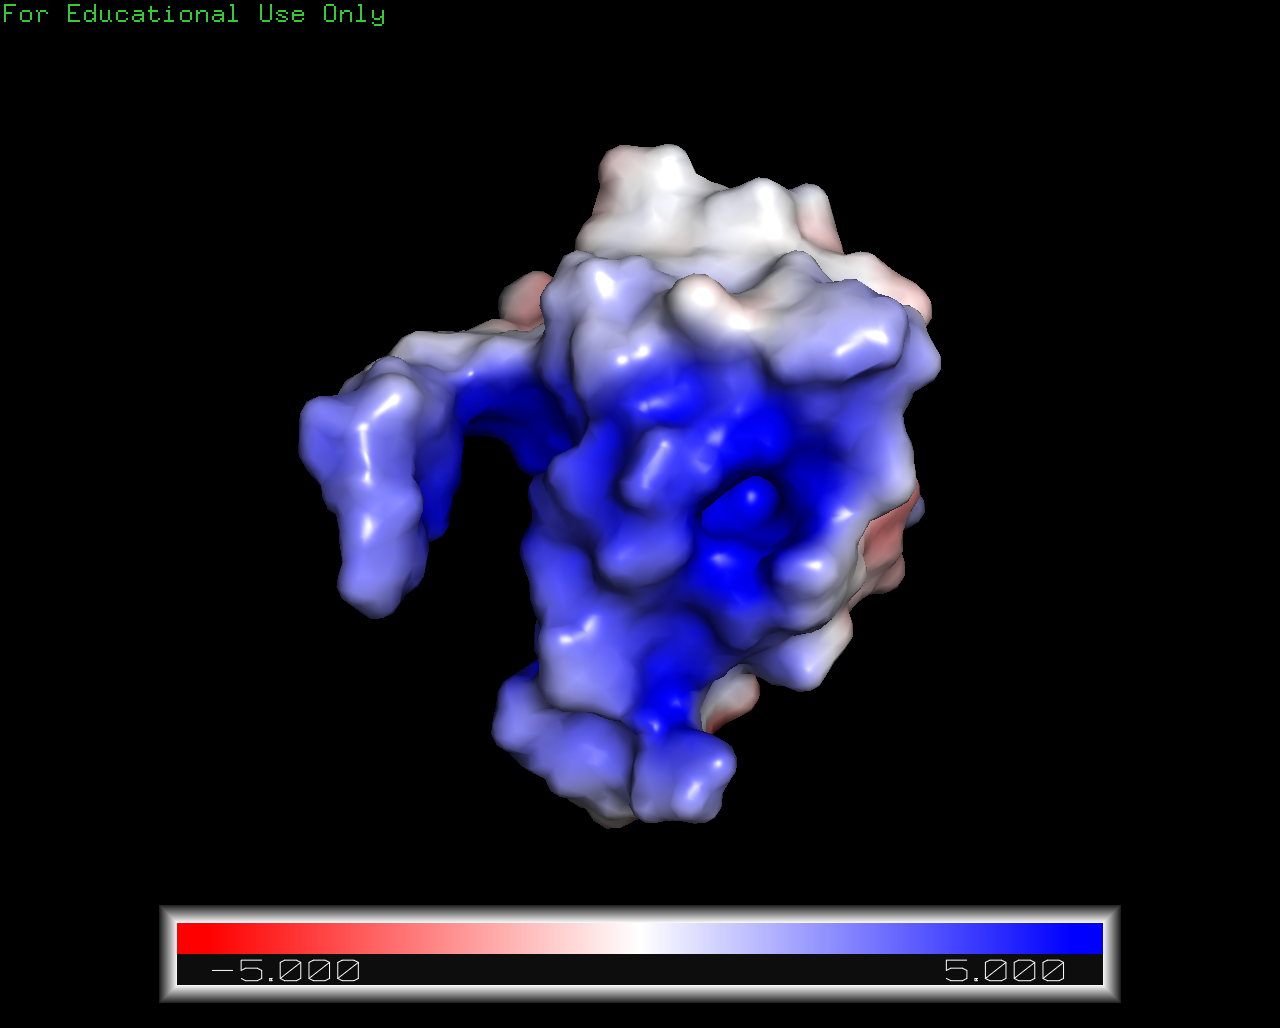

In [13]:
Image('3-1B.png', width=400)

**RUN 2**

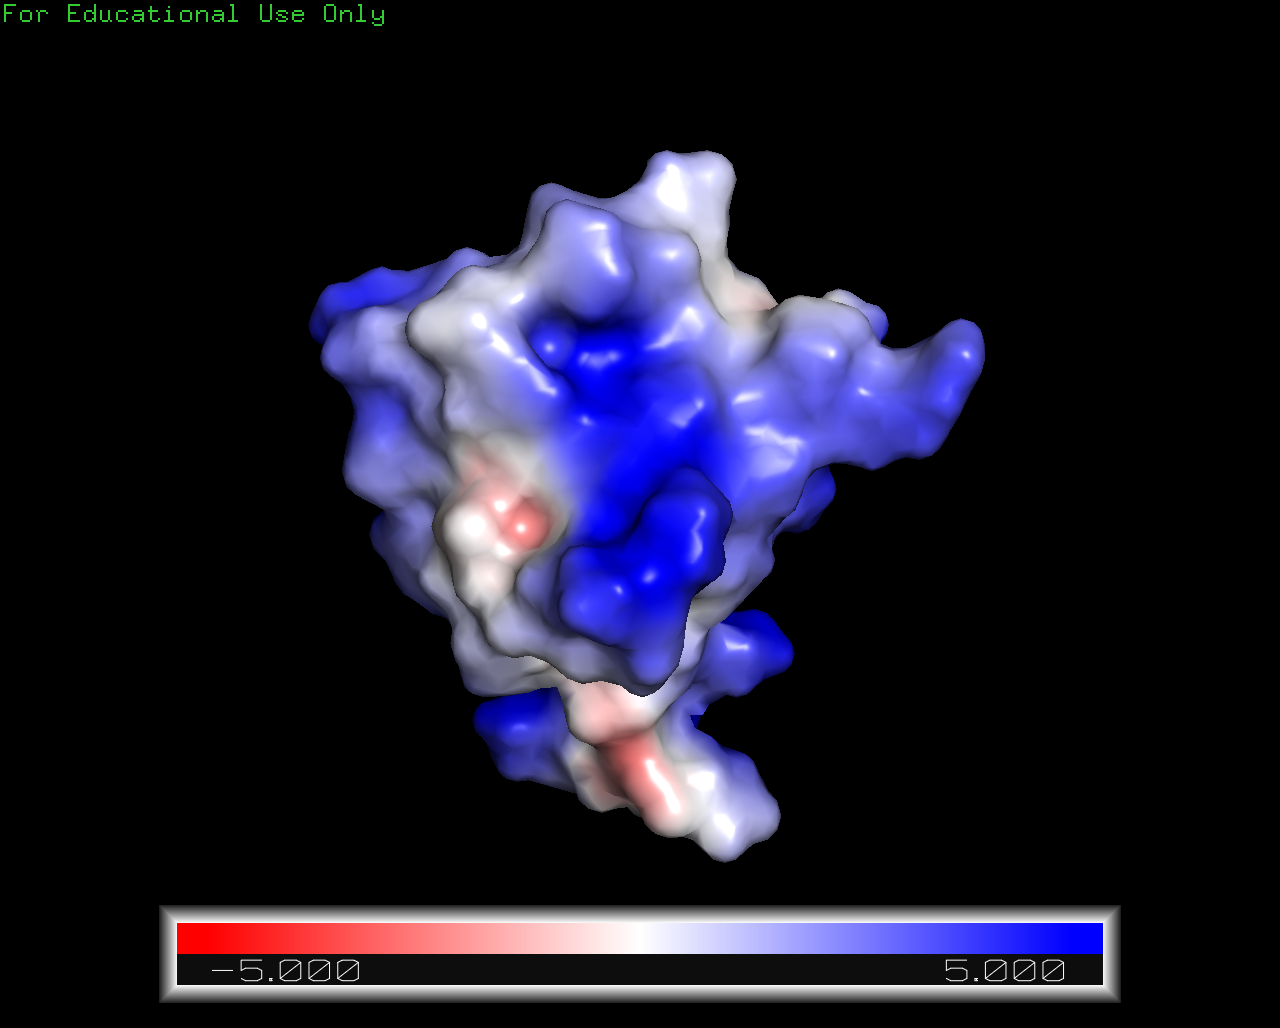

In [14]:
Image('3-2A.png', width=400)

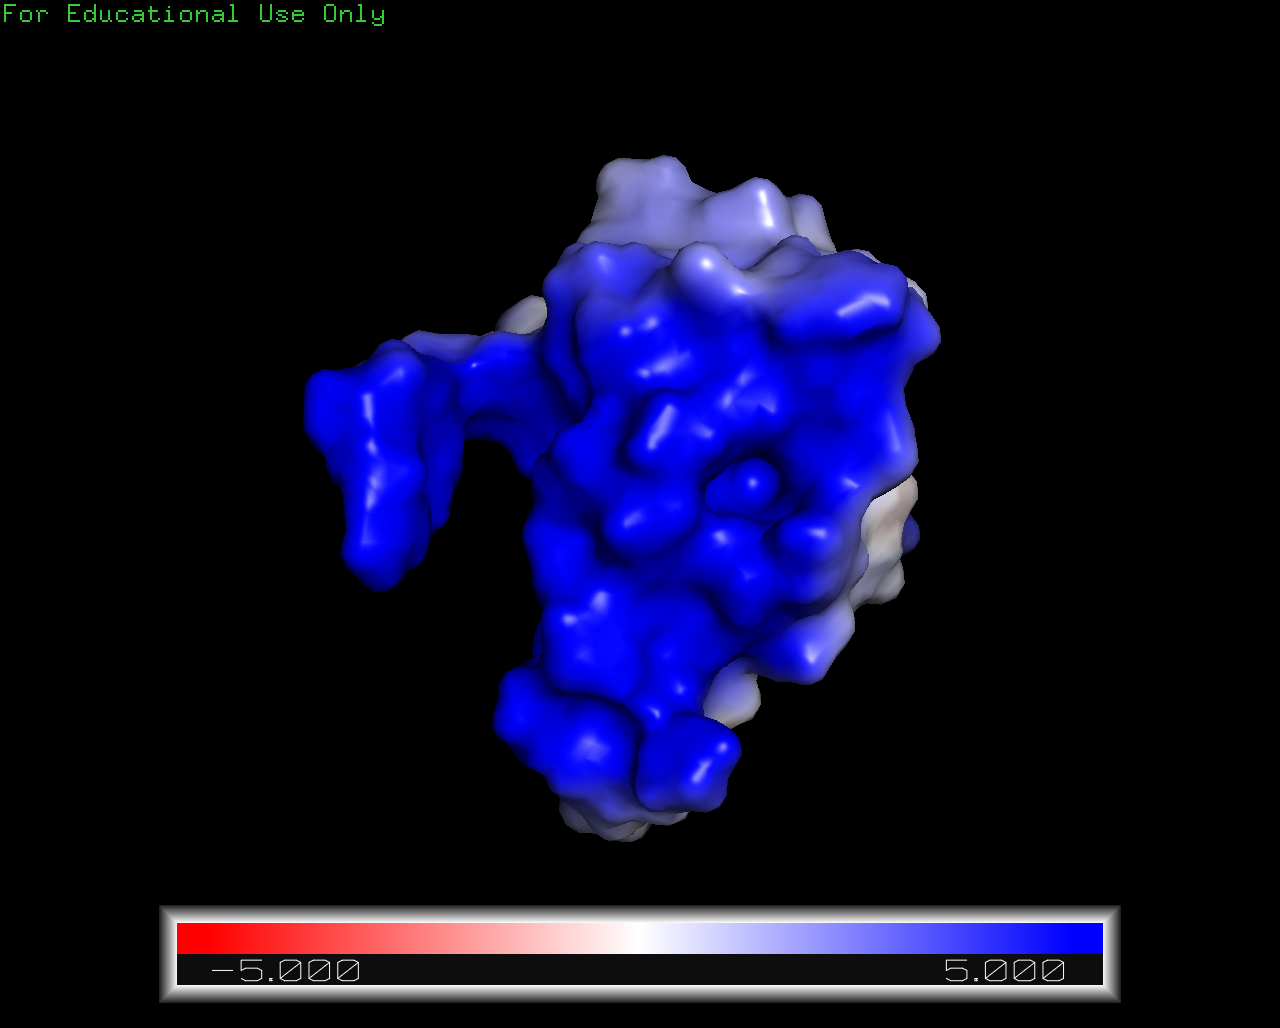

In [15]:
Image('3-2B.png', width=400)

**RUN 3**

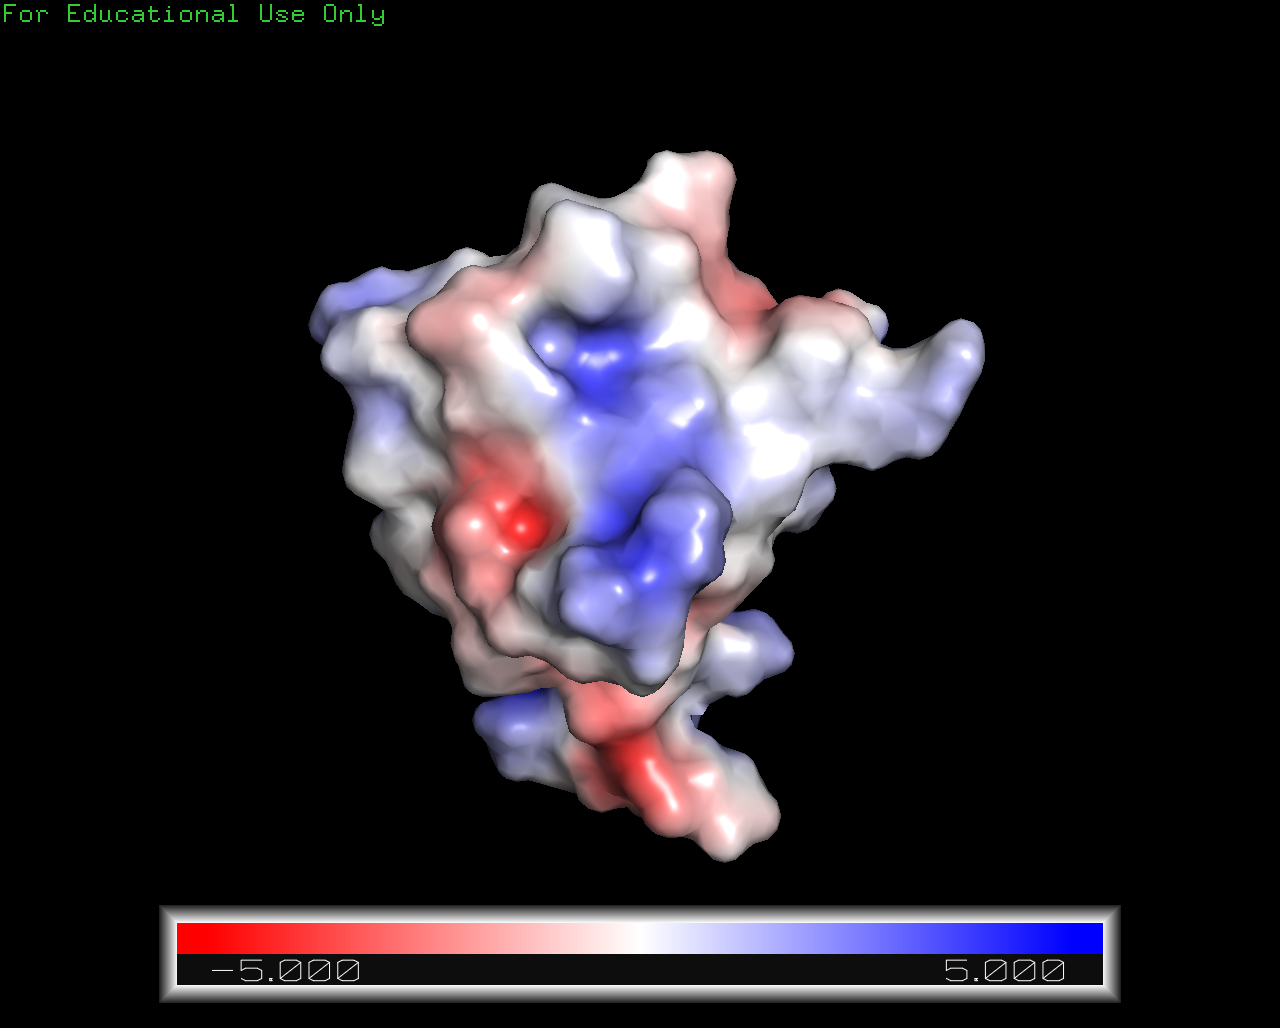

In [16]:
Image('3-3A.png', width=400)

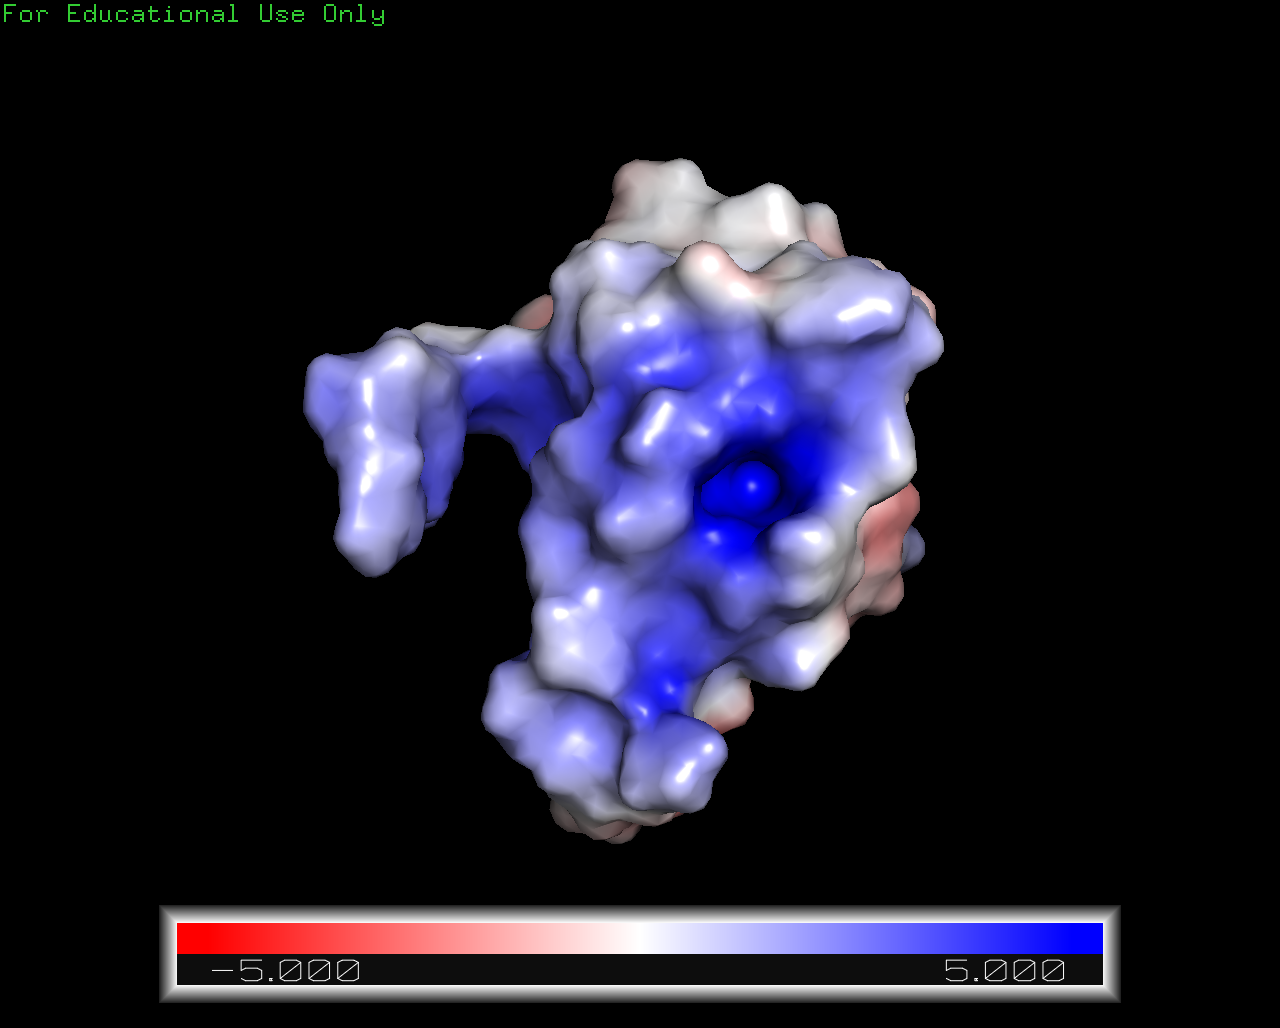

In [17]:
Image('3-3B.png', width=400)

### B. Based on your observations, how does changing the salt concentration affect the electrostatic potential? How might this be relevant to protein-DNA binding? Do you expect protein-DNA binding to be stronger under high or low salt concentrations? 5pts

It seems that lower the salt concentration, stronger the electrostatic potential. This is relevant to protein-DNA binding because it can alter a protein's affinity for DNA. In lower concentrations, a protein which usually does not bind to DNA may bind to it whereas in higher concentrations, a protein which usually does bind to DNA may not bind to it. Protein-DNA binding would be stronger under low salt concentrations.

### C. Based on the electrostatic potential you have observed in run #1 (under near-physiological conditions), and the known chemical and electrostatic properties of DNA, identify the region of this protein domain that is most likely to bind DNA. You can simply circle a region from the visualizations you produced in run #1 (add them as new figures in response to this question). 5pts

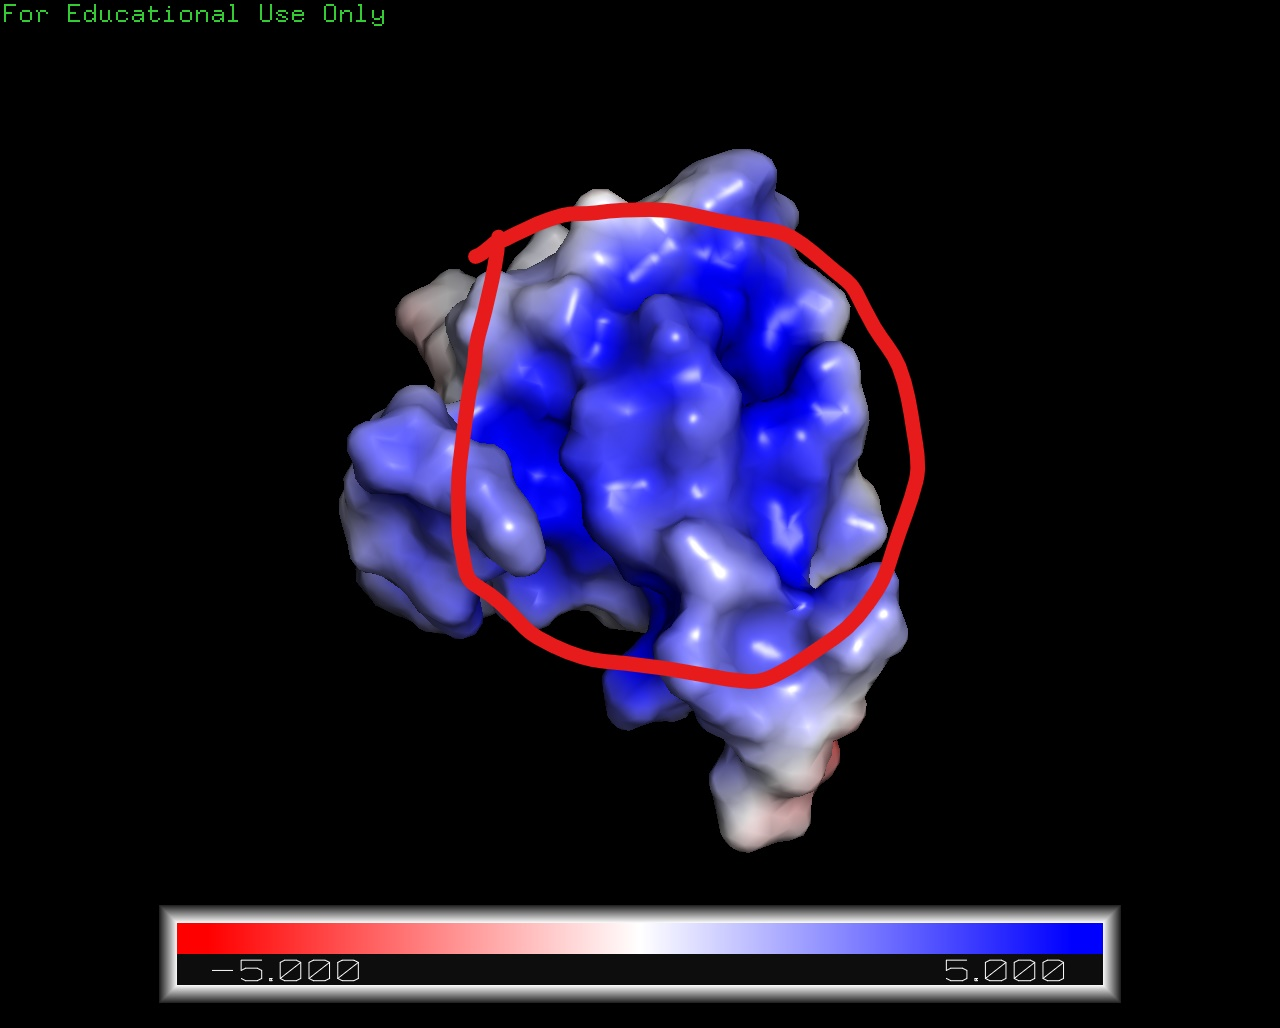

In [18]:
Image('3-C.jpg', width=400)

## Question 4: Force Field Energy Minimization using Python

In this question we will be using python and a very very (very) simple force-field to find the conformation of a molecule structure which minimizes a potential energy function

I have provided you two python scripts, `energy_minimization.py` and `Atoms.py`. You will be editing the first, but do not edit or modify the second in any way. You don’t even need to look at it. If you have never used python before, please spend some time reviewing the following tutorial (or one of the hundreds of others): https://www.programiz.com/python-programming/tutorial

Before proceeding, please install the packages “numpy” and “scipy” if they are not already installed:

`conda install numpy` <br>
`conda install scipy` <br>

### A. Open the script `energy_minimization.py` in a text editor. I recommend the program “geany” (google it), you don’t need something fancy.

### Now, have a look over the code and try to grasp a little of what it is doing. For any questions related to this homework, please post on the discussion boards located on blackboard (https://blackboard.usc.edu). Your task is simply to fill in a few lines of code to produce some output and then have a look at the results. The comments in the code will walk you through what you need to do, beginning at STEP 1.

### You need to:
* Calculate the total potential energy of the initial configuration of the atoms (using provided functions) and include this value in your report. 4pts
* Calculate the total potential energy of the final configuration, after energy minimization, and include this value in your report. 3pts
* Visualize the initial and final conformations of the molecule (represented by the “atoms” object) using PyMol and include these in your report. 3pts

In [19]:
# These statements import various python modules which you will not be using 
# directly.
import numpy as np
from numpy.linalg import norm
from scipy.optimize import minimize

# This is a custom module created for this HW. Please be sure that 'Atoms.py' is
# in the same directory as this script when running. "atoms" is an object that 
# stores the coordinates for some atoms that make up a molecule we will be minimizing
from Atoms import atoms

PI = 3.1415926
# Here are some parameters in our highly simplified force-field. These will be used in the functions
# below to compute energies
L0 = 1.4
TH0 = 2*PI/3
R0 = 1.4
DW = 1/6

################################################################################
# The following functions define various contributions to the potential energy.
# Please try to understand what they are doing, but you don't need to 
# understand every step! Don't edit this code at all!

def V_length(atoms):
    """This function takes the group of atoms and computes the total bond-length
    contribution to the potential energy"""
    
    Vl = 0 # this is the variable we will store the sum of all the energies in
    N = len(atoms)
    for i in range(N):
        j = (i+1) % N
        length = norm(atoms.coords[i] - atoms.coords[j]) # norm computes the length of a vector
        
        Vl += (length - L0)**2
    
    return Vl

def V_angles(atoms):
    """This function takes the group of atoms and computes the total bond-angle
    contribution to the potential energy"""
    
    Va = 0 # this is the variable we will store the sum of all the energies in
    N = len(atoms)
    for i in range(len(atoms)):
        j = (i+1) % N
        k = (i-1) % N
        x_ij = atoms.coords[j] - atoms.coords[i] # vector from atom i to j
        x_ik = atoms.coords[k] - atoms.coords[i] # vector from atom i to k
        theta = np.arccos(np.dot(x_ij, x_ik)/(norm(x_ij)*norm(x_ik))) # angle between the above two
        
        Va += (theta - TH0)**2
    
    return Va

def V_bonds(atoms):
    """This function takes the group of atoms and computes the total bond energy
    based on bond length and bond angles"""
    
    Vb = V_length(atoms) + V_angles(atoms)
    
    return Vb

def V_lennard_jones(atoms):
    """This function takes the group of atoms and computes the total 
    Lennard-Jones energy"""
    
    Vw = 0 # this is the variable we will store the sum of all the energies in
    N = len(atoms)
    for i in range(N):
        for j in range(i+1, N):
            r = norm(atoms.coords[i] - atoms.coords[j]) # distance from atom i to atom j
            
            Vw += DW*((R0/r)**12 -2*(R0/r)**6) # the Lennard-Jones interaction!
    
    return Vw

################################################################################
# The following function minimizes the given energy using a numerical 
# minimization approach. Don't edit this code at all!

def minimize_V(atoms):
    x0 = atoms.coords.flatten()
    
    def V(x):
        atoms.coords = x.reshape(6,3)
        return V_total(atoms)
    
    res = minimize(V, x0, method='Nelder-Mead', tol=1e-6)
    atoms.coords = res.x.reshape(6, 3)


################################################################################
# YOUR WORK BEGINS HERE!

# STEP 1 - complete this function to compute the total potential energy. It takes the object "atoms"
# as input and returns a number.
def V_total(atoms):
    
    Vt = V_bonds(atoms) + V_lennard_jones(atoms)
    
    return Vt

# STEP 2 - using the "print" function, compute the total energy for the group
# of atoms in their initial state, and report the value you got.

print('Initial energy:', V_total(atoms))

# Now let's save the initial configuration of the atoms using a method of the 
# atoms object. This will create a file called "initial.pdb"
atoms.save_pdb("initial")

# Now we are going to minimize the potential energy, V_total
minimize_V(atoms)

# STEP 3 - print the new minimized energy, and save the atom configuration like 
# before, calling it "final.pdb"
print('Final energy:', V_total(atoms))
atoms.save_pdb("final")


Initial energy: 1.387708454902051
Final energy: -1.090881845180913


<u>**Initial Conformation**</u>

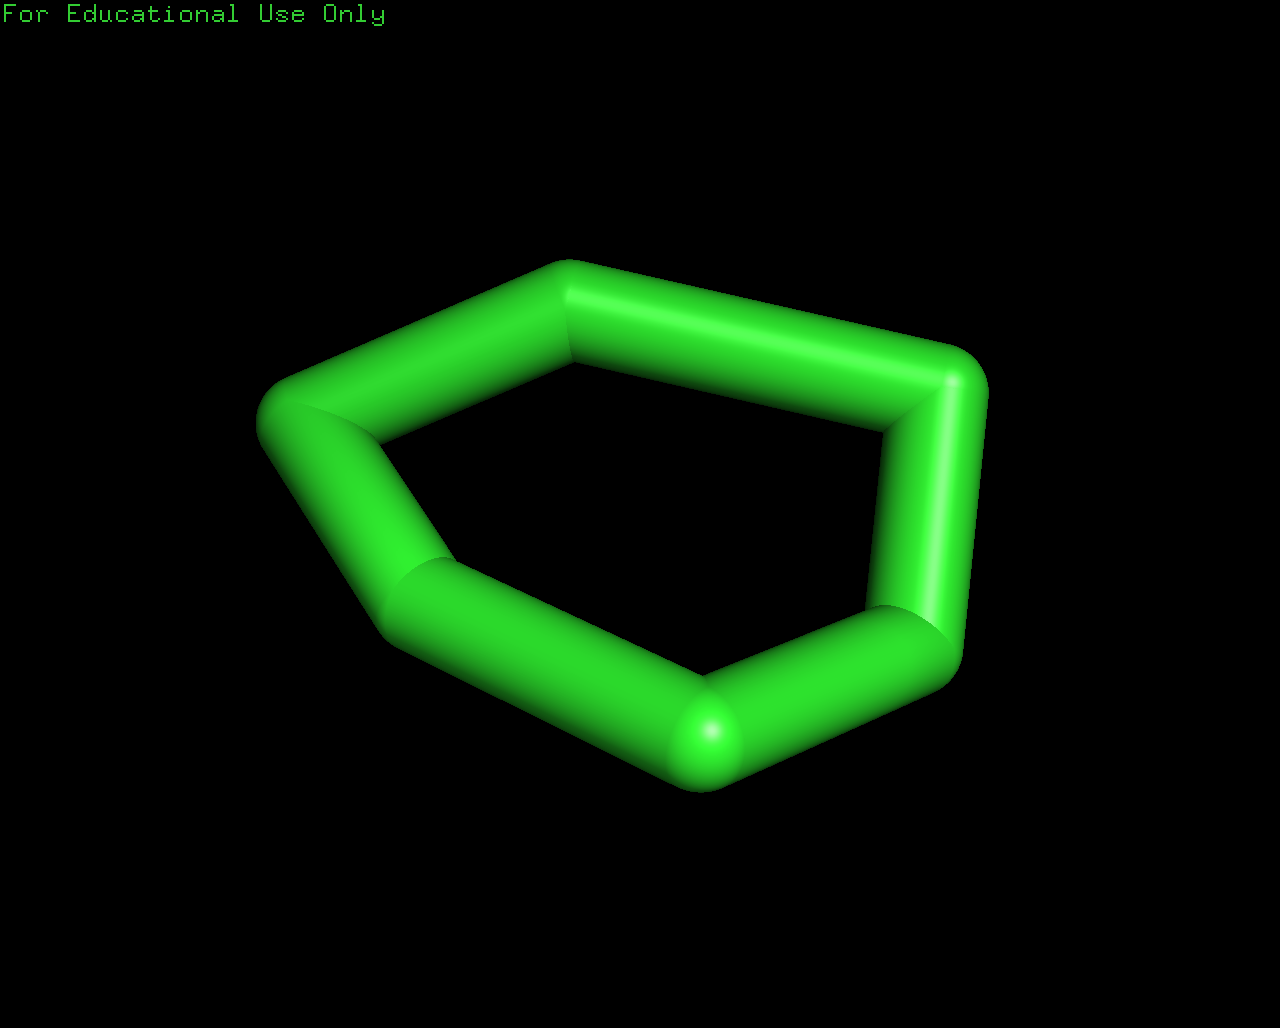

In [20]:
Image("initial.png", width=300)

<u>**Final Conformation**</u>

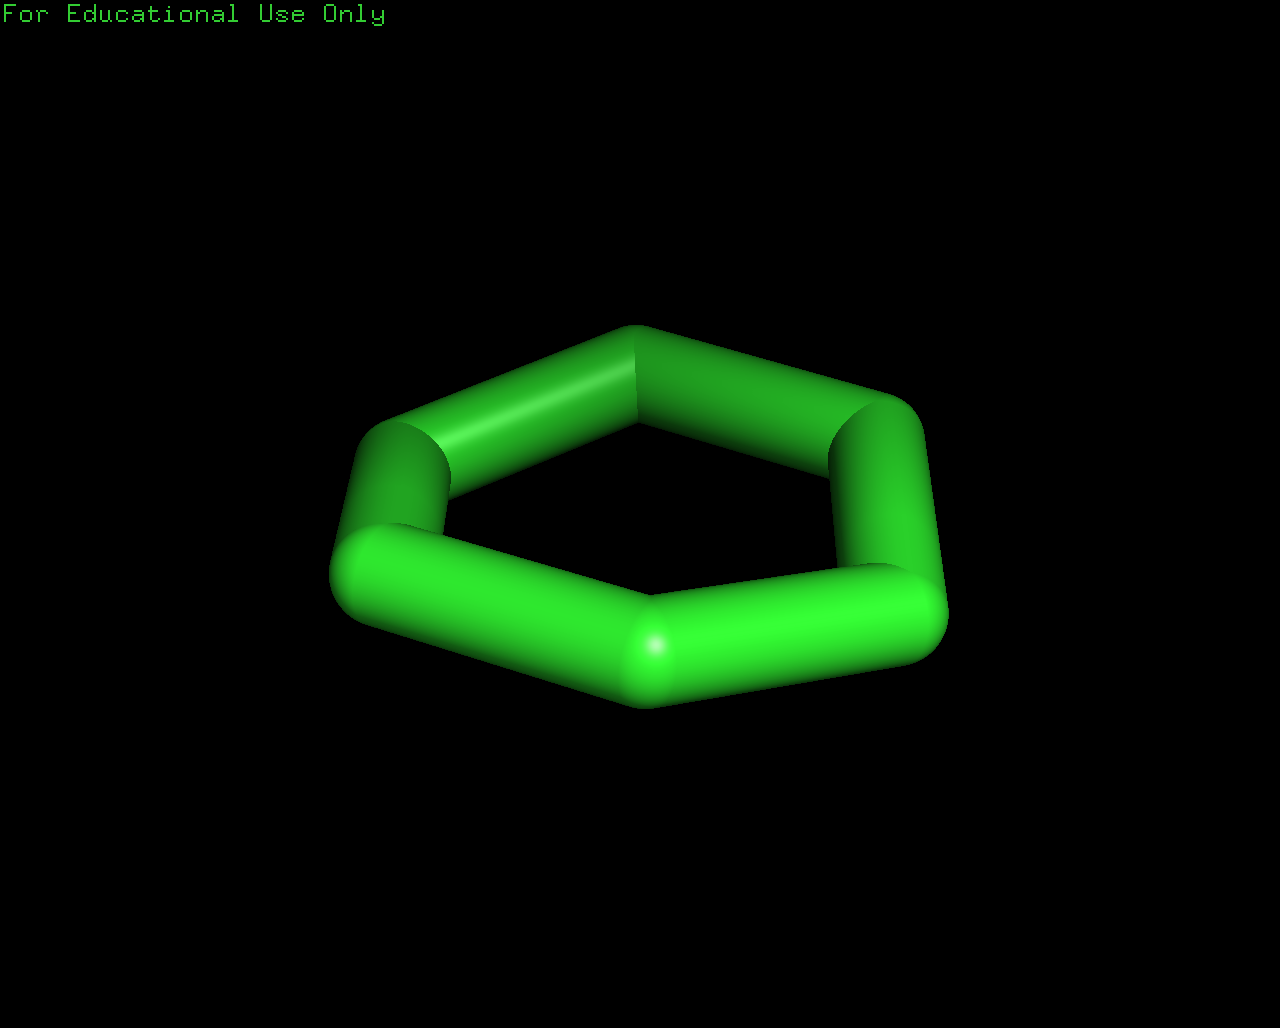

In [21]:
Image("final.png", width=300)

### B. **BONUS** You may have guessed by now that this molecule is benzene. However, an inspection of the final conformation will reveal that the carbon ring is not planar. This is because we have failed to include torsion angles in our force field!
### Experiment with some torsion potential energy functions and come up with an extra term in the force field which, when added to the total energy, will produce a planar molecule based on computed torsion angles.
### Include a visualization of your final minimized molecule AND the code for your torsion potential in your report. 8pts

In [22]:
from scipy.spatial import distance

def V_torsion(atoms):
    V = 0
    N = len(atoms)
    for i in range(len(atoms)):
        a = atoms.coords[i]
        b = atoms.coords[(i+1)%N]
        c = atoms.coords[(i+2)%N]
        d = atoms.coords[(i+3)%N]
        
        A = a - b
        B = c - b
        C = b - c
        D = d - c
        
        t1 = np.cross(A,B)
        t2 = np.cross(C,D)
        
        tau = (t1 @ t2) / (distance.euclidean((t1[0], t1[1], t1[2]), (0,0,0)) * distance.euclidean((t2[0], t2[1], t2[2]), (0,0,0)))
        tau = np.arccos(tau)
        V += np.sin(tau)
    return V

def V_total_torsion(atoms):
    Vt = V_bonds(atoms) + V_lennard_jones(atoms) + V_torsion(atoms)
    return Vt

def minimize_V_torsion(atoms):
    x0 = atoms.coords.flatten()
    
    def V(x):
        atoms.coords = x.reshape(6,3)
        return V_total_torsion(atoms)
    
    res = minimize(V, x0, method='Nelder-Mead', tol=1e-6)
    atoms.coords = res.x.reshape(6, 3)

In [23]:
print(atoms.coords)
print('Initial energy:', V_total_torsion(atoms))
minimize_V_torsion(atoms)
print('Final energy:', V_total_torsion(atoms))
atoms.save_pdb("torsion")

[[ 0.25 -1.05 -1.07]
 [-0.56 -1.39  0.01]
 [-0.82 -0.44  0.99]
 [-0.    0.68  1.08]
 [ 0.78  1.05 -0.01]
 [ 0.75  0.25 -1.16]]
Initial energy: 0.22622799458914056


<ipython-input-22-893d5859ac8c>:21: RuntimeWarning: invalid value encountered in arccos
  tau = np.arccos(tau)


Final energy: -1.0784571933231717


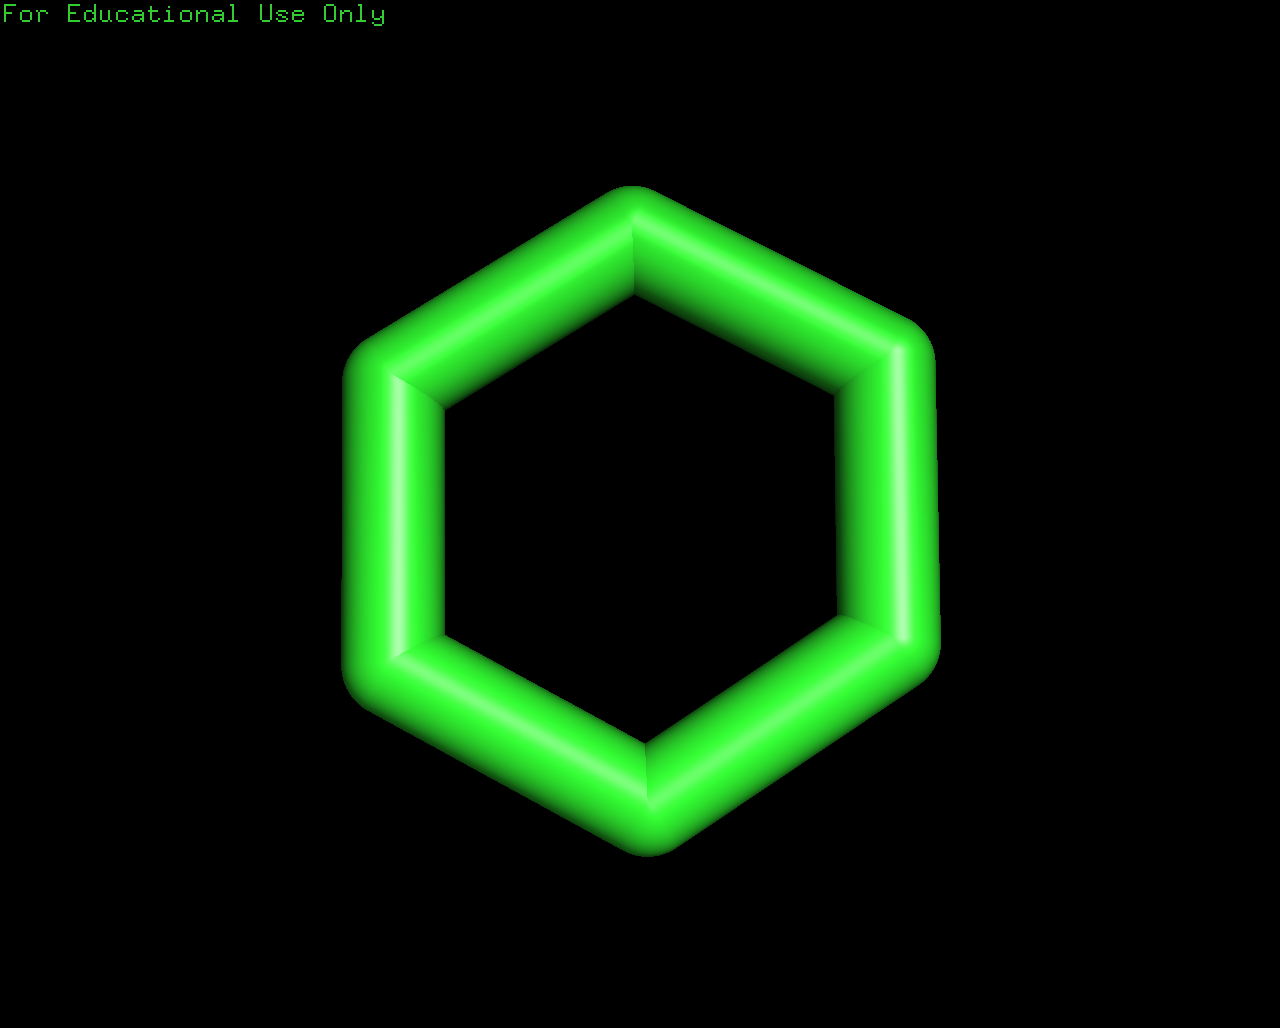

In [24]:
Image('4-B.png', width=300)